In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data) 

In [5]:
m, n = data.shape

In [6]:
np.random.shuffle(data)

In [7]:
data_dev = data[0:1000].T
X_dev = data_dev[1:n]
y_dev = data_dev[0]
X_dev = X_dev / 255.

data_train = data[1000:m].T
X_train = data_train[1:n]
y_train = data_train[0]
X_train = X_train / 255.

In [8]:
y_train.max()

9

In [9]:
X_train[:, 0].shape #first col

(784,)

In [10]:
def init_params():
    W1 = np.random.randn(10,784) * 0.01
    b1 = np.zeros((10,1))
    W2 = np.random.randn(10,10) *0.01
    b2 = np.zeros((10,1))

    return W1,b1,W2,b2

In [11]:
def ReLu(Z):
    a = np.maximum(0,Z)

    return a


In [12]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [13]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1,X) + b1
    A1 = ReLu(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, A2, Z2

In [14]:
def one_hot(Y):
    one_hot_y = np.zeros((Y.size, Y.max() + 1 ))
    one_hot_y[np.arange(Y.size), Y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [15]:
def deri_ReLu(Z):
    return Z > 0

In [16]:
def back_prop(Z1, A1, A2, Z2, X, Y,W1,b1,W2, b2):

    one_hot_y = one_hot(Y)
    
    dZ2 = A2 - one_hot_y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    
    db2 = 1/m *np.sum(dZ2, axis = 1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * deri_ReLu(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    return dW1, db1, dW2, db2

In [17]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2

In [18]:
def get_pred(A2):
    return np.argmax(A2, 0)

In [19]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return ((np.sum(predictions == Y) / Y.size)*100)

In [20]:
def gradient_des(X, Y, iteration, alpha):
    W1, b1, W2, b2 = init_params()

    for i in range(iteration ):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, A2, Z2, X, Y, W1,b1,W2, b2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration :", i)
            print("Accuracy: ", get_accuracy(get_pred(A2), Y), "%")
    return W1, b1, W2, b2

In [21]:
W1, b1, W2, b2 = gradient_des(X_train, y_train, 2001, 0.2)

Iteration : 0
[8 3 8 ... 3 3 7] [6 8 2 ... 5 1 1]
Accuracy:  14.029268292682929 %
Iteration : 100
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  72.78048780487805 %
Iteration : 200
[6 8 2 ... 8 1 1] [6 8 2 ... 5 1 1]
Accuracy:  82.17560975609756 %
Iteration : 300
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  85.49756097560976 %
Iteration : 400
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  86.99756097560976 %
Iteration : 500
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  87.7 %
Iteration : 600
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  88.13170731707316 %
Iteration : 700
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  87.81463414634146 %
Iteration : 800
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  88.7560975609756 %
Iteration : 900
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  88.4560975609756 %
Iteration : 1000
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  88.7439024390244 %
Iteration : 1100
[6 8 2 ... 5 1 1] [6 8 2 ... 5 1 1]
Accuracy:  88.87317073170732 %
Iteration : 1200
[6

In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_pred(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


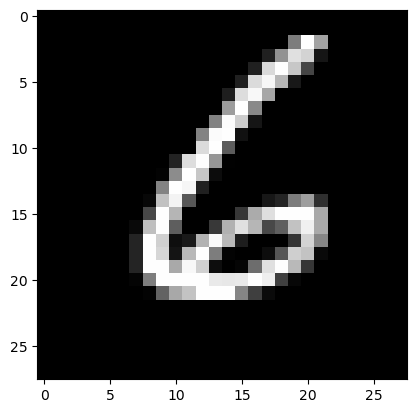

Prediction:  [8]
Label:  8


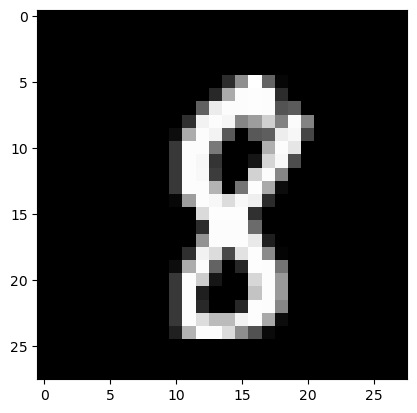

Prediction:  [2]
Label:  2


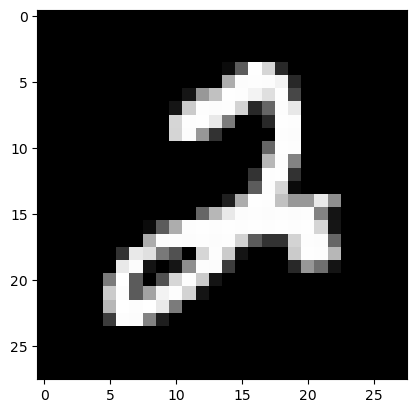

Prediction:  [4]
Label:  4


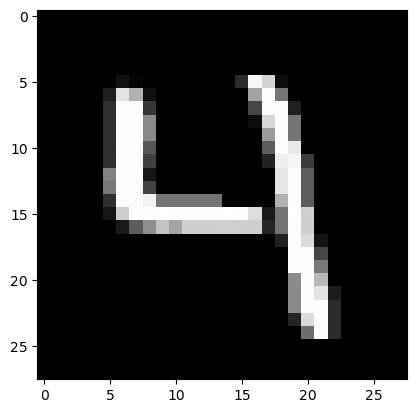

In [23]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [24]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, y_dev)

[9 3 2 7 3 6 3 7 0 6 0 5 7 7 8 1 8 3 6 1 9 4 1 2 3 4 8 8 9 8 6 2 8 7 8 6 1
 4 7 6 6 9 8 0 5 4 0 1 2 2 5 3 7 9 2 3 3 7 0 9 7 0 2 3 6 7 4 9 0 0 6 2 3 7
 2 8 8 5 3 2 8 4 6 2 9 6 5 7 9 4 6 7 0 8 3 5 8 7 4 8 8 6 4 9 2 0 5 7 3 1 8
 3 6 1 6 1 8 2 5 3 6 0 2 4 8 5 5 2 8 5 7 4 6 5 3 2 1 3 9 8 4 4 9 1 8 2 8 4
 4 7 4 9 5 2 8 4 8 7 7 1 4 3 0 3 4 4 0 5 2 3 5 0 9 7 2 1 8 2 0 9 7 7 5 4 6
 6 7 5 5 0 2 0 4 4 4 2 3 0 7 1 4 2 9 5 4 3 8 4 8 7 6 8 4 6 6 0 5 6 2 9 5 8
 0 6 4 1 6 8 1 4 0 9 5 1 7 0 1 7 1 0 7 3 5 8 4 7 8 1 3 2 9 3 0 8 4 1 0 9 0
 7 1 4 0 8 8 0 3 0 5 0 6 4 7 0 0 7 5 0 1 5 6 5 5 5 8 1 8 2 4 7 2 1 9 6 6 0
 8 6 7 9 6 4 6 9 7 9 0 8 6 2 9 6 1 2 5 3 1 1 6 2 5 3 1 1 2 6 6 1 8 9 4 2 4
 7 8 2 5 4 6 7 2 0 6 3 6 5 3 8 7 9 2 3 1 5 2 5 7 9 2 7 8 8 5 1 2 1 8 9 2 6
 6 1 4 0 4 3 3 3 2 0 5 0 9 8 5 2 1 8 1 6 2 6 1 9 9 5 5 5 6 2 2 1 2 2 0 8 4
 4 0 7 9 7 9 9 1 5 7 9 8 3 9 4 7 1 6 8 5 7 4 9 7 6 3 5 7 9 2 4 5 3 7 8 3 9
 5 5 4 3 3 4 8 5 3 2 2 2 4 1 4 7 5 6 1 7 4 8 9 1 7 1 4 5 3 0 5 3 8 5 4 3 9
 8 7 8 3 0 5 6 4 4 1 2 9 

86.4